<a href="https://colab.research.google.com/github/aaronle03/Image-Classification-Model/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import requests
import zipfile
from pathlib import Path

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory exists.")

else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data..")
        f.write(request.content)

    with zipfile.ZipFile(data_path /  "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


## 2. Become one with the data (data preparations and data exploration)

In [4]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [5]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.


In [6]:
# Setup training and test paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Visualizing and image

Let's write some code to:
1. Get all of the image paths
2. Pick a random image path using Pythons random.choice()
3. Get the iamge class using `pathlib.Path.parent.stem`
4. Since we're working with images, let's open the image with Python's PIL
5. We'll then show the image and print metadata

data/pizza_steak_sushi/test/sushi/479711.jpg
sushi
Random iamge path: data/pizza_steak_sushi/test/sushi/479711.jpg
Image class: sushi
Image height: 512
Image width: 512


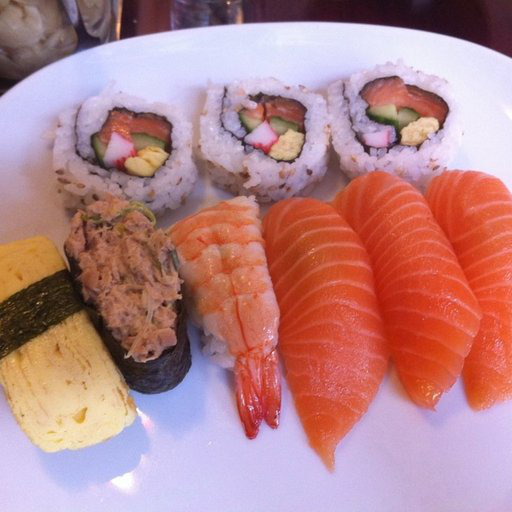

In [19]:
import random
from PIL import Image

# Set Seed
# random.seed(42)

# 1. Get all iamge paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem
print(image_class)

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random iamge path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(-0.5, 511.5, 511.5, -0.5)

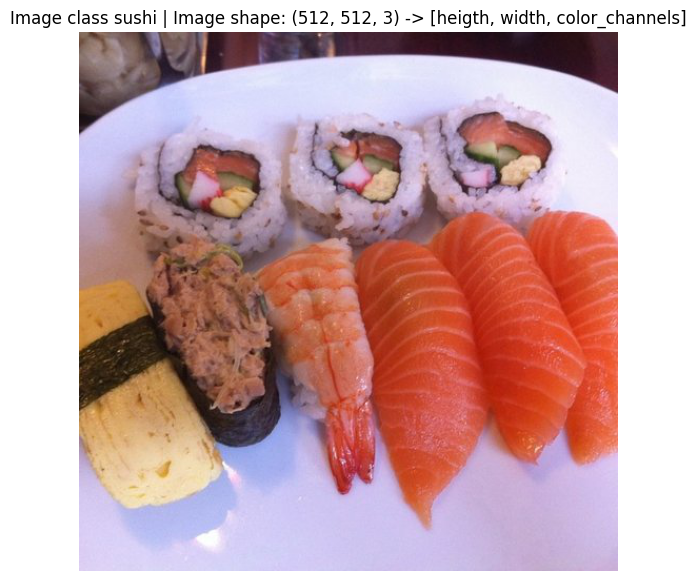

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class {image_class} | Image shape: {img_as_array.shape} -> [heigth, width, color_channels]")
plt.axis(False);

In [21]:
img_as_array

array([[[133, 111,  97],
        [134, 112,  98],
        [134, 112,  98],
        ...,
        [ 69,  40,  44],
        [ 70,  41,  45],
        [ 71,  42,  46]],

       [[130, 107,  93],
        [131, 109,  95],
        [132, 110,  96],
        ...,
        [ 70,  39,  44],
        [ 71,  40,  45],
        [ 71,  40,  45]],

       [[126, 103,  87],
        [128, 105,  89],
        [131, 108,  92],
        ...,
        [ 70,  39,  44],
        [ 70,  39,  44],
        [ 71,  40,  45]],

       ...,

       [[220, 206, 241],
        [221, 207, 242],
        [221, 207, 242],
        ...,
        [200, 174, 213],
        [200, 174, 213],
        [201, 175, 214]],

       [[219, 205, 240],
        [221, 207, 242],
        [222, 208, 243],
        ...,
        [201, 175, 214],
        [201, 175, 214],
        [201, 175, 214]],

       [[221, 207, 242],
        [223, 209, 244],
        [225, 211, 246],
        ...,
        [204, 176, 216],
        [204, 176, 216],
        [204, 176, 216]]